### Numpy Primer
----------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import random

## Advance Numpy : Simulating Short Rate Processes

In this example, we are going to simulate the **Vasicek short rate model** using Python as well as NumPy and vectorization. The SDE of the model is given by:

$$
dr_t = \kappa(\theta - r_t)dt + \sigma dZ_t
$$

A possible discretization of the model is given by

$$
r_t = r_s + \kappa (\theta - r_s) \Delta t + \sigma \sqrt{\Delta t} z_t
$$

for $s = t - \Delta t$. $Z_t$ is a standard Brownian motion, $z$ a standard normally distributed rv.

In [2]:
# All assumptions as Python variables

# model parameters
r0 = 0.01  # starting value
kappa = 1.0  # mean-reversion factor
theta = 0.025  # long-term mean
sigma = 0.01  # volatiltiy
T = 1.0  # time horizon in year fractions
# Monte Carlo parameters
I = 10  # number of paths
M = 15  # number of time intervals
dt = T / M  # length of time interval

### A Pure Python Version

Using import random

In [3]:
def vasicek_python(I=I, M=M):
    paths = {}
    for i in range(I):
        path = [r0, ]
        for t in range(1, M + 1):
            r_t = path[t - 1] + kappa * (theta - path[t - 1]) * dt \
                    + sigma * dt ** 0.5 * random.gauss(0, 1)
            path.append(r_t)
        paths[i] = path
    return paths

### Breaking the Vasicek Simulation down

Let us start inside out:

    1. r_t: It calculates the interest rate value on each point
        a. It takes the result of the previous simulation as input --> t -1
        b. It uses the outcome of a normal distribution with mean 0 and standard deviation of 1 to add the 
            stochastic component
        c. The rest of the values are just parameters previously provided
        d. the result is appended to the path List
    2. Re run r_t to get the next value in the path
    3. Save all the values of the path in the paths dictionary
    4. Run again a full path repeating steps 1 to 4

In [4]:
paths = vasicek_python(10,15)
%time paths = vasicek_python(10,15)

Wall time: 0 ns


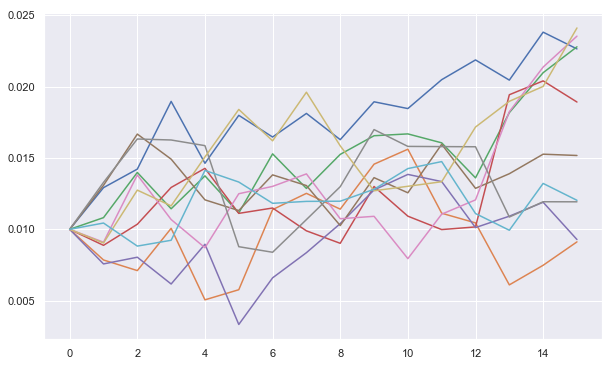

In [5]:
plt.figure(figsize=(10, 6))
for i in paths.keys():
    plt.plot(paths[i])

### The Vectorized NumPy Version

Let us run the same function but this time using Numpy vectorization

In [6]:
np.random.standard_normal(2)

array([ 0.59992665, -0.85755557])

In [7]:
def vasicek_numpy(I=I, M=M):
    paths = np.zeros((M + 1, I)) # matrix has M rows & I columns
    paths[0] = r0
    for t in range(1, M + 1):
        paths[t] = paths[t - 1] + kappa * (theta - paths[t - 1]) * dt \
                    + sigma * dt ** 0.5 * np.random.standard_normal(I)
    return paths

### Breaking down the simulation

Numpy uses vectors which offers the ability to run all the values of each step on 1

For 15 steps only 15 runs are needs which dramatically reduces processing time

In [8]:
paths1 = vasicek_numpy(10,15)
%time paths1 = vasicek_numpy(10,15)

Wall time: 1 ms


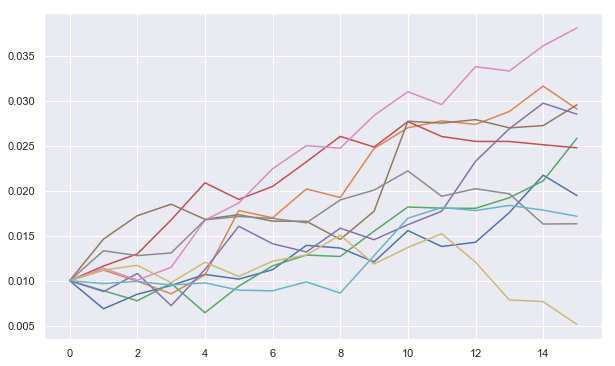

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(paths1);